# Data analysis

In this notebook I create the graphs for the presentation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.scale import LogScale
import matplotlib.image as img
import glob

sns.set()


In [2]:
df_new = pd.DataFrame(columns=["Preprocessing Type", "Dataset", "Drive", "silog", "log10", "rmse", "rmse_log", "abs_rel", "sq_rel", "d1", "d2", "d3"])
df_glpn = pd.DataFrame(columns=["Preprocessing Type", "Dataset", "Drive", "silog", "log10", "rmse", "rmse_log", "abs_rel", "sq_rel", "d1", "d2", "d3"])
data_cols = ["silog", "log10", "rmse", "rmse_log", "abs_rel", "sq_rel", "d1", "d2", "d3"]

for filename in glob.glob("../eval/glpn/*.csv"):
  df_glpn = pd.concat([df_glpn, pd.read_csv(filename)])

for filename in glob.glob("../eval/newcf/*.csv"):
  df_new = pd.concat([df_new, pd.read_csv(filename)])

In [3]:
print(df_glpn.shape)
df_glpn[data_cols] = df_glpn[data_cols].apply(pd.to_numeric, errors='coerce', axis=1)
df_glpn.head()

(97605, 13)


,Preprocessing Type,Dataset,Drive,silog,log10,rmse,rmse_log,abs_rel,sq_rel,d1,d2,d3,Unnamed: 0
0,Original,KITTI,1,11.525009,0.057516,5.339899,0.169106,0.147489,0.969435,0.856362,0.978077,0.997167,1.0
1,Greyscale,KITTI,1,10.969698,0.048565,4.526619,0.144447,0.121807,0.677242,0.894277,0.990565,0.999989,2.0
2,Edge Detection,KITTI,1,10.861147,0.038073,3.799415,0.124643,0.094208,0.499652,0.943281,0.982828,0.999890,3.0
3,Edge Detection and Colour Threshold 5,KITTI,1,12.896543,0.048826,5.105117,0.154125,0.122544,0.823247,0.894421,0.979069,0.997862,4.0
4,Edge Detection and Colour Threshold 50,KITTI,1,12.137215,0.058388,5.491094,0.173364,0.149946,1.029733,0.852835,0.974286,0.996484,5.0


In [4]:
print(df_new.shape)
df_new[data_cols] = df_new[data_cols].apply(pd.to_numeric, errors='coerce', axis=1)
df_new.head()

(28386, 13)


,Preprocessing Type,Dataset,Drive,silog,log10,rmse,rmse_log,abs_rel,sq_rel,d1,d2,d3,Unnamed: 0
0,Original,KITTI,NaN,3.639082,0.013920,1.243180,0.044729,0.032834,0.051665,0.995712,0.999713,1.000000,1.0
1,Greyscale,KITTI,NaN,7.088826,0.019319,2.291108,0.073135,0.042594,0.136403,0.978110,0.996517,0.999592,2.0
2,Edge Detection,KITTI,NaN,28.641726,0.113336,10.069857,0.385734,0.201604,2.557279,0.631624,0.765872,0.868563,3.0
3,Edge Detection and Colour Threshold 5,KITTI,NaN,18.117164,0.088867,7.611177,0.269915,0.173228,1.497955,0.624769,0.899171,0.980833,4.0
4,Edge Detection and Colour Threshold 50,KITTI,NaN,6.307438,0.016615,2.077334,0.063162,0.037361,0.106572,0.989705,0.996186,1.000000,5.0


# Sorting the columns

To have a better overview of the results we sort dataset by a set, non alphabetical order by preprocessing type.

In [5]:
def sort_col(x):
  return ['Original', 'Greyscale', 'Desaturated', 'Oversaturated', 'Edge Detection', 'Edge Detection and Colour Threshold 5', 'Edge Detection and Colour Threshold 50', 'Edge Detection and Greyscale Threshold 5', 'Edge Detection and Greyscale Threshold 50'].index(x)
  
df_glpn['Sorted'] = df_glpn['Preprocessing Type'].map(sort_col)
df_glpn.sort_values(by='Sorted', inplace=True)

df_new['Sorted'] = df_new['Preprocessing Type'].map(sort_col)
df_new.sort_values(by='Sorted', inplace=True)

# Compare GLPN with NeWCFS

Create a unified dataset

In [6]:
df_joined = pd.concat([df_glpn[df_glpn['Preprocessing Type'] == 'Original'], df_new[df_new['Preprocessing Type'] == 'Original']],
                        keys=['GLPN', 'NeWCFs'])
df_joined = df_joined.reset_index().drop(["level_1", "Drive", "Unnamed: 0", "Sorted"], axis=1)
df_joined.shape

(13999, 12)

In [7]:
df_joined[df_joined['Dataset'] == 'KITTI'].groupby("level_0").mean()\
        .style.set_precision(4).background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '13px'})

/tmp/ipykernel_20009/2870360335.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .style.set_precision(4).background_gradient(cmap ='viridis')\


,silog,log10,rmse,rmse_log,abs_rel,sq_rel,d1,d2,d3
level_0,,,,,,,,,
GLPN,14.0430,0.0529,5.3478,0.1763,0.1384,1.1728,0.8745,0.9735,0.9912
NeWCFs,5.5579,0.0162,1.9105,0.0604,0.0370,0.1134,0.9865,0.9979,0.9995


In [8]:
df_joined[df_joined['Dataset'] == 'nyu'].groupby("level_0").mean()\
        .style.set_precision(4).background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '13px'})

/tmp/ipykernel_20009/3057982865.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .style.set_precision(4).background_gradient(cmap ='viridis')\


,silog,log10,rmse,rmse_log,abs_rel,sq_rel,d1,d2,d3
level_0,,,,,,,,,
GLPN,3.0834,0.0117,0.0885,0.0369,0.0273,0.0035,0.9982,0.9997,0.9999
NeWCFs,3.8978,0.0150,0.1722,0.0474,0.0343,0.0078,0.9961,0.9994,0.9998


# Compare algorithms with preprocessed Images

In [9]:
df_glpn[df_glpn["Dataset"] == "KITTI"]\
        .reset_index(drop=True)\
        .drop(['Dataset', 'Drive', 'Unnamed: 0'], axis=1)\
        .groupby('Preprocessing Type')\
        .mean()\
        .sort_values(by='Sorted', ascending=True)\
        .drop('Sorted', axis=1)\
        .style.set_precision(4).background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '13px'})

/tmp/ipykernel_20009/1733700223.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .style.set_precision(4).background_gradient(cmap ='viridis')\


,silog,log10,rmse,rmse_log,abs_rel,sq_rel,d1,d2,d3
Preprocessing Type,,,,,,,,,
Original,14.0430,0.0529,5.3478,0.1763,0.1384,1.1728,0.8745,0.9735,0.9912
Greyscale,14.4444,0.0496,5.0262,0.1681,0.1259,0.9911,0.8831,0.9753,0.9923
Desaturated,14.0790,0.0526,5.3319,0.1757,0.1374,1.1667,0.8753,0.9736,0.9913
Oversaturated,13.9611,0.0528,5.2981,0.1753,0.1377,1.1473,0.8746,0.9740,0.9915
Edge Detection,16.9108,0.0501,5.2132,0.1802,0.1169,0.9004,0.8662,0.9618,0.9874
Edge Detection and Colour Threshold 5,15.3736,0.0469,4.9053,0.1653,0.1157,0.8883,0.8873,0.9747,0.9918
Edge Detection and Colour Threshold 50,14.5960,0.0510,5.1737,0.1723,0.1311,1.0804,0.8756,0.9744,0.9916
Edge Detection and Greyscale Threshold 5,17.0663,0.0508,5.2565,0.1812,0.1177,0.9184,0.8615,0.9624,0.9879
Edge Detection and Greyscale Threshold 50,15.2886,0.0499,5.1046,0.1709,0.1246,0.9919,0.8750,0.9735,0.9918


In [10]:
df_glpn[df_glpn["Dataset"] == "nyu"]\
        .reset_index(drop=True)\
        .drop(['Dataset', 'Drive', 'Unnamed: 0'], axis=1)\
        .groupby('Preprocessing Type')\
        .mean()\
        .sort_values(by='Sorted', ascending=True)\
        .drop('Sorted', axis=1)\
        .style.set_precision(4).background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '13px'})

/tmp/ipykernel_20009/2004315857.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .style.set_precision(4).background_gradient(cmap ='viridis')\


,silog,log10,rmse,rmse_log,abs_rel,sq_rel,d1,d2,d3
Preprocessing Type,,,,,,,,,
Original,3.0834,0.0117,0.0885,0.0369,0.0273,0.0035,0.9982,0.9997,0.9999
Greyscale,3.6161,0.0137,0.1009,0.0427,0.0320,0.0046,0.9975,0.9996,0.9999
Desaturated,3.1056,0.0118,0.0893,0.0372,0.0276,0.0035,0.9982,0.9997,0.9999
Oversaturated,3.1796,0.0120,0.0899,0.0378,0.0280,0.0036,0.9981,0.9997,0.9999
Edge Detection,17.5686,0.0825,0.5362,0.2336,0.1780,0.1311,0.6893,0.9072,0.9789
Edge Detection and Colour Threshold 5,14.8221,0.0619,0.3920,0.1819,0.1533,0.0834,0.8002,0.9606,0.9901
Edge Detection and Colour Threshold 50,4.4382,0.0189,0.1515,0.0581,0.0451,0.0114,0.9925,0.9986,0.9998
Edge Detection and Greyscale Threshold 5,19.1446,0.0819,0.5253,0.2359,0.2002,0.1422,0.6814,0.9202,0.9791
Edge Detection and Greyscale Threshold 50,5.8929,0.0228,0.1851,0.0720,0.0547,0.0181,0.9828,0.9968,0.9995


In [17]:
df_new[df_new["Dataset"] == "KITTI"]\
        .reset_index(drop=True)\
        .drop(['Dataset', 'Drive', 'Unnamed: 0'], axis=1)\
        .groupby('Preprocessing Type')\
        .mean()\
        .sort_values(by='Sorted', ascending=True)\
        .drop('Sorted', axis=1)\
        .style.set_precision(4).background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '13px'})

/tmp/ipykernel_20009/4081916036.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .style.set_precision(4).background_gradient(cmap ='viridis')\


,silog,log10,rmse,rmse_log,abs_rel,sq_rel,d1,d2,d3
Preprocessing Type,,,,,,,,,
Original,5.5579,0.0162,1.9105,0.0604,0.0370,0.1134,0.9865,0.9979,0.9995
Greyscale,8.9875,0.0255,3.2134,0.0990,0.0555,0.2756,0.9518,0.9917,0.9978
Desaturated,6.0292,0.0176,2.0966,0.0656,0.0399,0.1326,0.9828,0.9973,0.9994
Oversaturated,6.2126,0.0180,2.1768,0.0671,0.0407,0.1330,0.9836,0.9975,0.9993
Edge Detection,37.4220,0.1797,12.0950,0.5565,0.2935,3.9854,0.4366,0.6536,0.7758
Edge Detection and Colour Threshold 5,16.3629,0.0727,6.6584,0.2283,0.1445,1.1560,0.7561,0.9266,0.9792
Edge Detection and Colour Threshold 50,7.4688,0.0262,2.9743,0.0899,0.0575,0.2341,0.9641,0.9954,0.9990
Edge Detection and Greyscale Threshold 5,24.7213,0.1118,9.1992,0.3517,0.2060,2.2213,0.6055,0.8148,0.9169
Edge Detection and Greyscale Threshold 50,11.8579,0.0394,4.5746,0.1427,0.0822,0.5362,0.9068,0.9762,0.9936


In [12]:
df_new[df_new["Dataset"] == "nyu"]\
        .reset_index(drop=True)\
        .drop(['Dataset', 'Drive', 'Unnamed: 0'], axis=1)\
        .groupby('Preprocessing Type')\
        .mean()\
        .sort_values(by='Sorted', ascending=True)\
        .drop('Sorted', axis=1)\
        .style.set_precision(4).background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '13px'})

/tmp/ipykernel_20009/2329001812.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .style.set_precision(4).background_gradient(cmap ='viridis')\


,silog,log10,rmse,rmse_log,abs_rel,sq_rel,d1,d2,d3
Preprocessing Type,,,,,,,,,
Original,3.8978,0.0150,0.1722,0.0474,0.0343,0.0078,0.9961,0.9994,0.9998
Greyscale,5.7664,0.0249,0.2910,0.0749,0.0555,0.0238,0.9880,0.9969,0.9989
Desaturated,4.0876,0.0166,0.1889,0.0511,0.0379,0.0093,0.9958,0.9993,0.9998
Oversaturated,4.0847,0.0159,0.1788,0.0498,0.0363,0.0084,0.9958,0.9993,0.9998
Edge Detection,22.3669,0.1298,1.3351,0.3580,0.2430,0.3904,0.4553,0.7855,0.9219
Edge Detection and Colour Threshold 5,10.9872,0.0480,0.6336,0.1475,0.1008,0.0953,0.8978,0.9779,0.9893
Edge Detection and Colour Threshold 50,4.3086,0.0171,0.1947,0.0533,0.0390,0.0101,0.9950,0.9991,0.9997
Edge Detection and Greyscale Threshold 5,14.0475,0.0690,0.8324,0.2015,0.1403,0.1614,0.7569,0.9560,0.9815
Edge Detection and Greyscale Threshold 50,6.2032,0.0274,0.3184,0.0818,0.0608,0.0285,0.9835,0.9963,0.9986


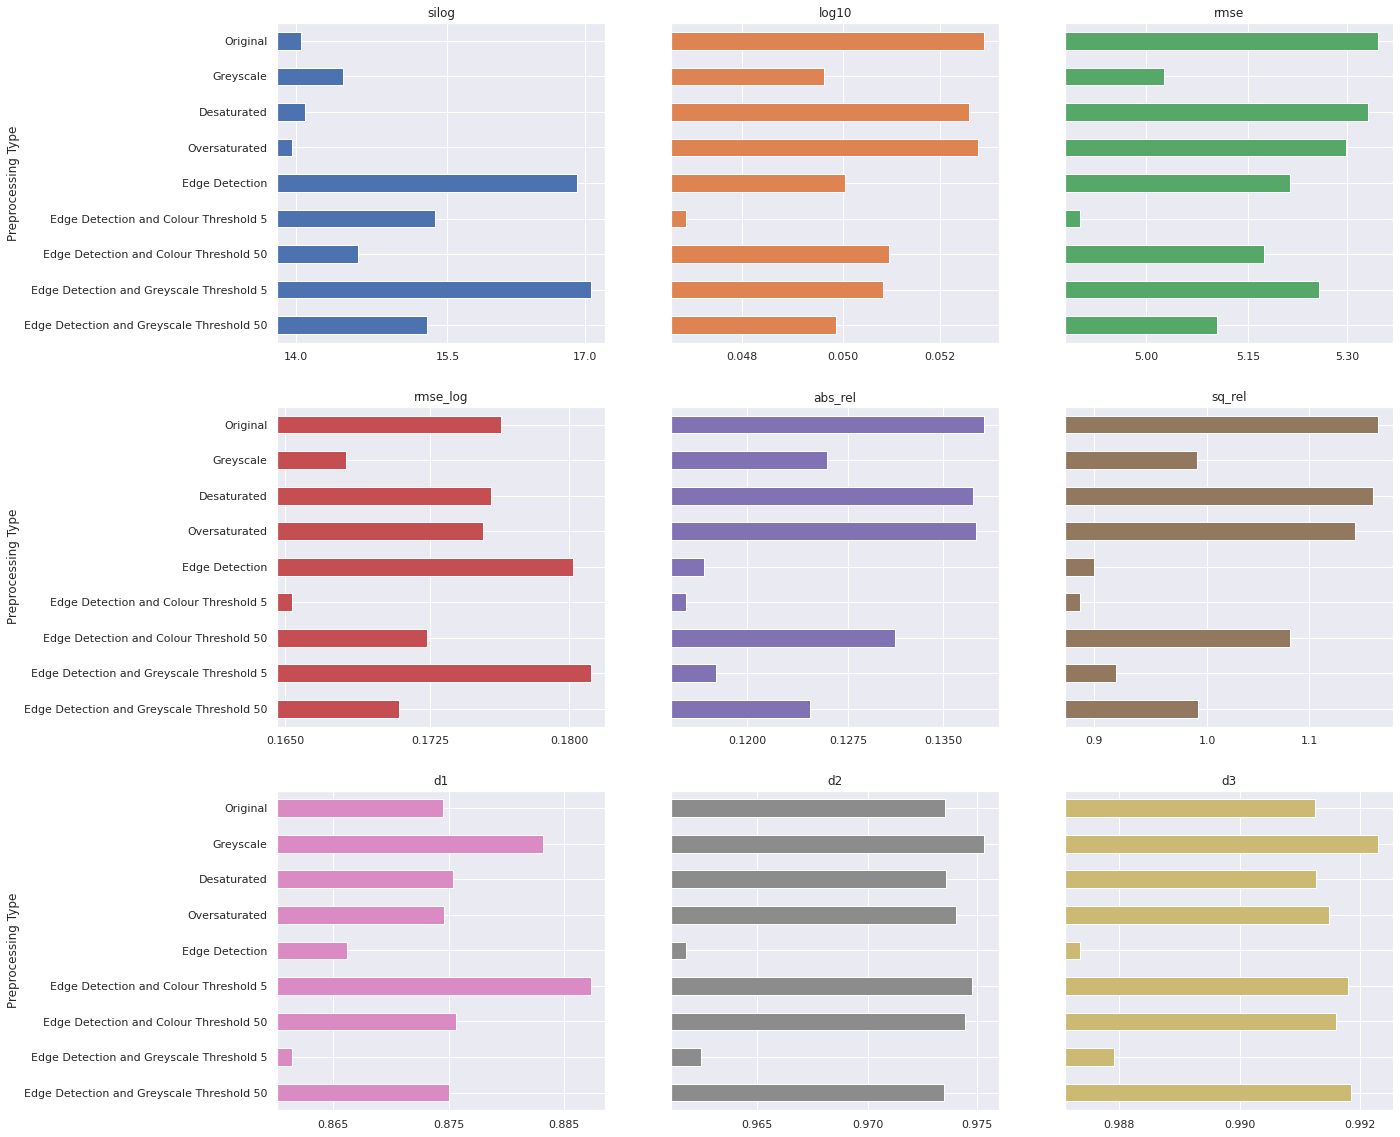

In [13]:
from matplotlib.ticker import ScalarFormatter, NullFormatter

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=[20,20], sharey=True)

for axs in axes:
  for ax in axs:
    ax.set_xscale("log")
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    ax.get_xaxis().set_minor_formatter(NullFormatter())

axes[0][0].set_xticks([14, 15.5, 17])
axes[0][1].set_xticks([0.048, 0.05, 0.052])
axes[0][2].set_xticks([5, 5.15, 5.3])
axes[1][0].set_xticks([0.165, 0.1725, 0.18])
axes[1][1].set_xticks([0.12, 0.1275, 0.135])
axes[1][2].set_xticks([0.9, 1, 1.1])
axes[2][0].set_xticks([0.865, 0.875, 0.885])
axes[2][1].set_xticks([0.965, 0.97, 0.975])
axes[2][2].set_xticks([0.988, 0.99, 0.992])

df_glpn[df_glpn["Dataset"] == "KITTI"].reset_index(drop=True).drop(['Dataset', 'Drive', 'Unnamed: 0'], axis=1).groupby('Preprocessing Type').mean().sort_values(by='Sorted', ascending=False).drop('Sorted', axis=1).plot.barh(subplots=True, ax=axes, legend=None)
plt.show()

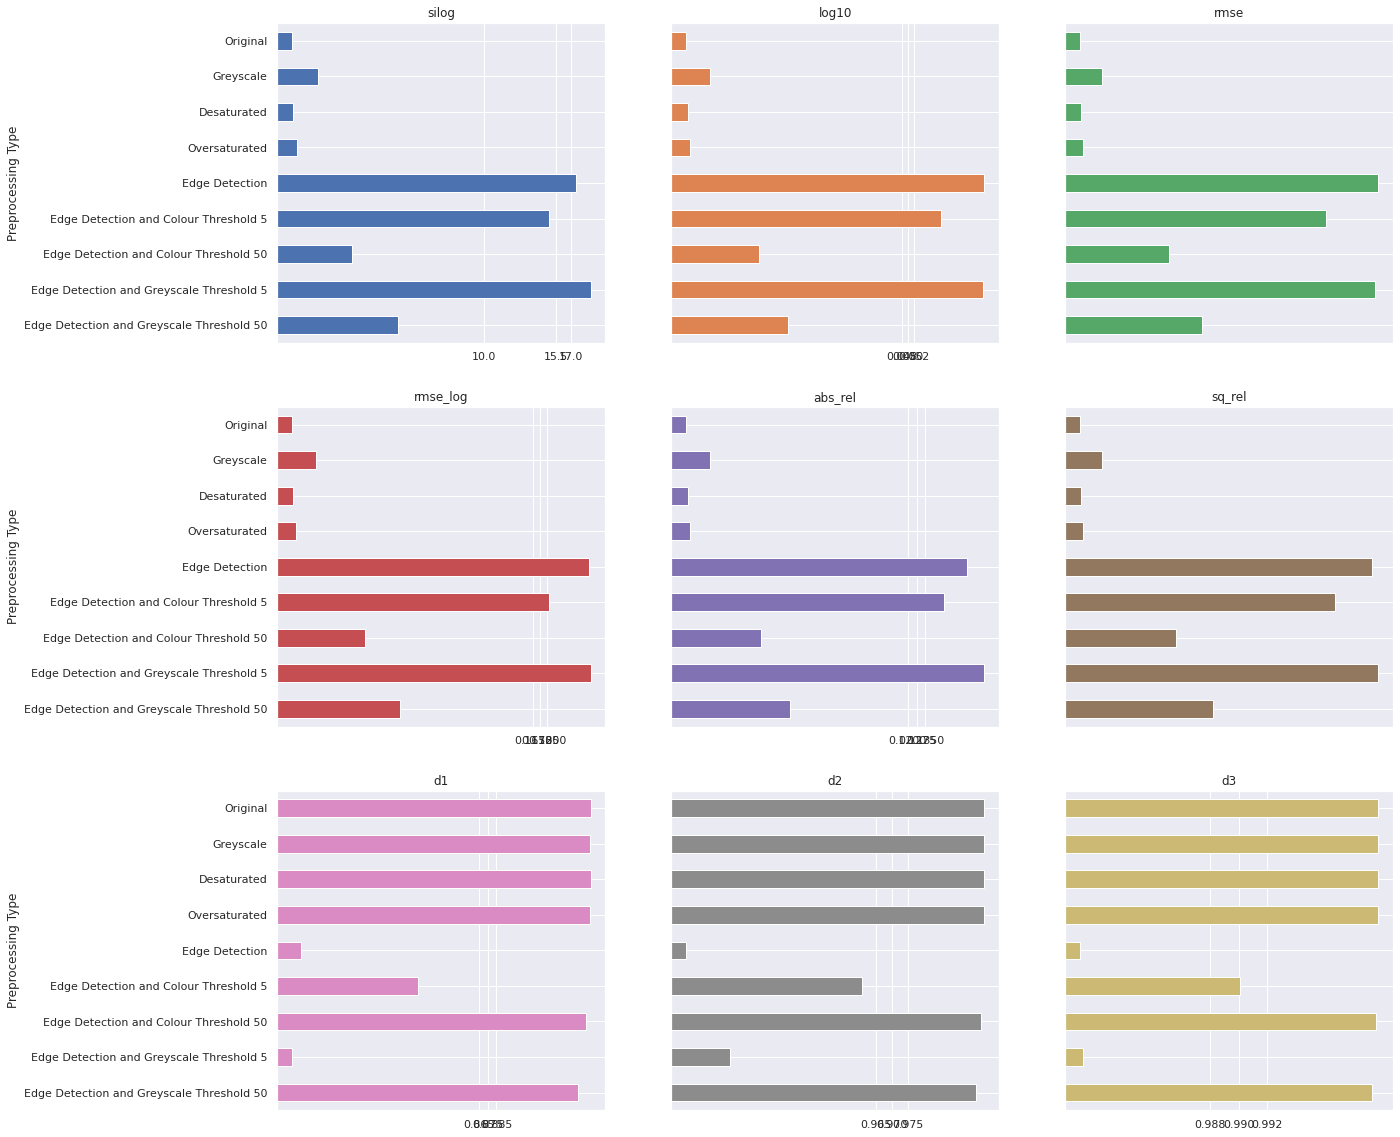

In [14]:
from matplotlib.ticker import ScalarFormatter, NullFormatter

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=[20,20], sharey=True)

for axs in axes:
  for ax in axs:
    ax.set_xscale("log")
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    ax.get_xaxis().set_minor_formatter(NullFormatter())

axes[0][0].set_xticks([10, 15.5, 17])
axes[0][1].set_xticks([0.048, 0.05, 0.052])
axes[0][2].set_xticks([5, 5.15, 5.3])
axes[1][0].set_xticks([0.165, 0.1725, 0.18])
axes[1][1].set_xticks([0.12, 0.1275, 0.135])
axes[1][2].set_xticks([0.9, 1, 1.1])
axes[2][0].set_xticks([0.865, 0.875, 0.885])
axes[2][1].set_xticks([0.965, 0.97, 0.975])
axes[2][2].set_xticks([0.988, 0.99, 0.992])

p = df_glpn[df_glpn["Dataset"] == "nyu"].reset_index(drop=True).drop(['Dataset', 'Drive', 'Unnamed: 0'], axis=1).groupby('Preprocessing Type').mean().sort_values(by='Sorted', ascending=False).drop('Sorted', axis=1).plot.barh(subplots=True, ax=axes, legend=None)
plt.show()

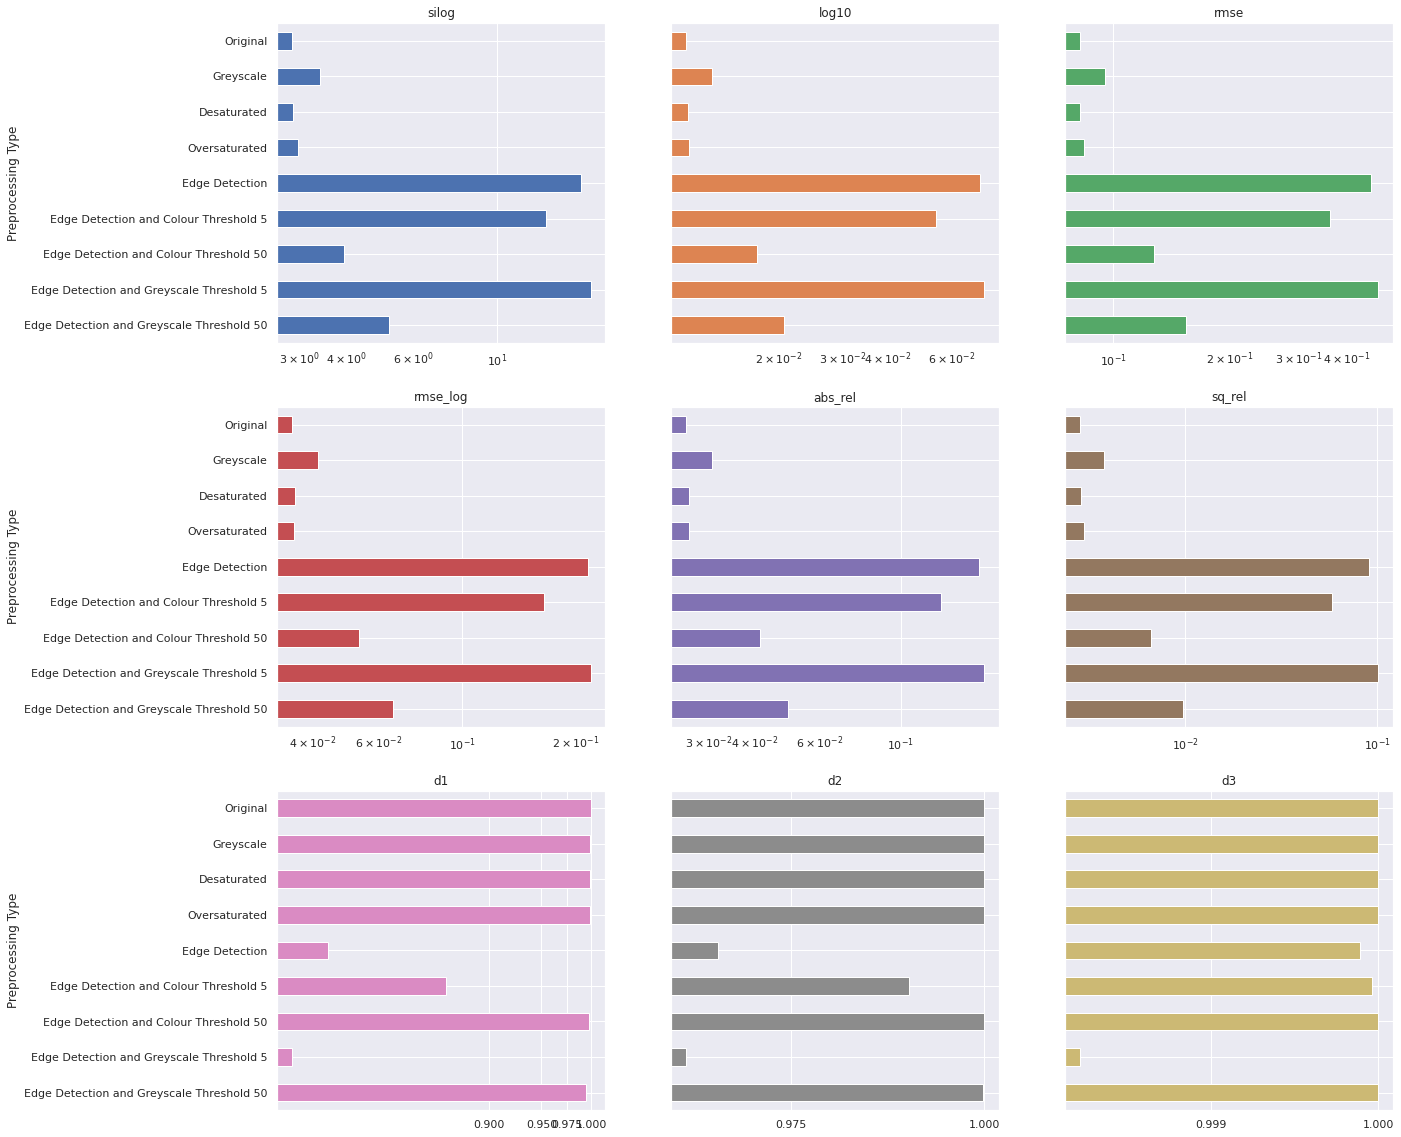

In [15]:
import matplotlib

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=[20,20], sharey=True)

for axs in axes[:-1]:
  for ax in axs:
    ax.set_xscale("log")

for ax in axes[2][:2]:
  ax.set_xscale("log")
  ax.get_xaxis().set_major_formatter(ScalarFormatter())
  ax.get_xaxis().set_minor_formatter(NullFormatter())
  ax.set_xticks([0.9, 0.95, 0.975, 1])

ax = axes[2][2]
ax.set_xscale("log")
ax.get_xaxis().set_major_formatter(ScalarFormatter())
ax.get_xaxis().set_minor_formatter(NullFormatter())
ax.set_xticks([0.99, 0.995, 0.999, 1])

plt.gca().xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
p = df_glpn[df_glpn["Dataset"] == "nyu"].reset_index(drop=True).drop(['Dataset', 'Drive', 'Unnamed: 0'], axis=1).groupby('Preprocessing Type').median().sort_values(by='Sorted', ascending=False).drop('Sorted', axis=1).plot.barh(subplots=True, ax=axes, legend=None)
plt.show()

In [16]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=[20,20], sharey=True)

for axs in axes:
  for ax in axs:
    #ax.semilogx()
    #LogScale(ax)
    ax.set_xscale("log")

p = df_new[df_new["Dataset"] == "KITTI"].reset_index(drop=True).drop(['Dataset', 'Drive', 'Unnamed: 0'], axis=1).groupby('Preprocessing Type').mean().sort_values(by='Sorted', ascending=False).drop('Sorted', axis=1).plot.barh(subplots=True, ax=axes, legend=None)
plt.show()

KeyboardInterrupt: 

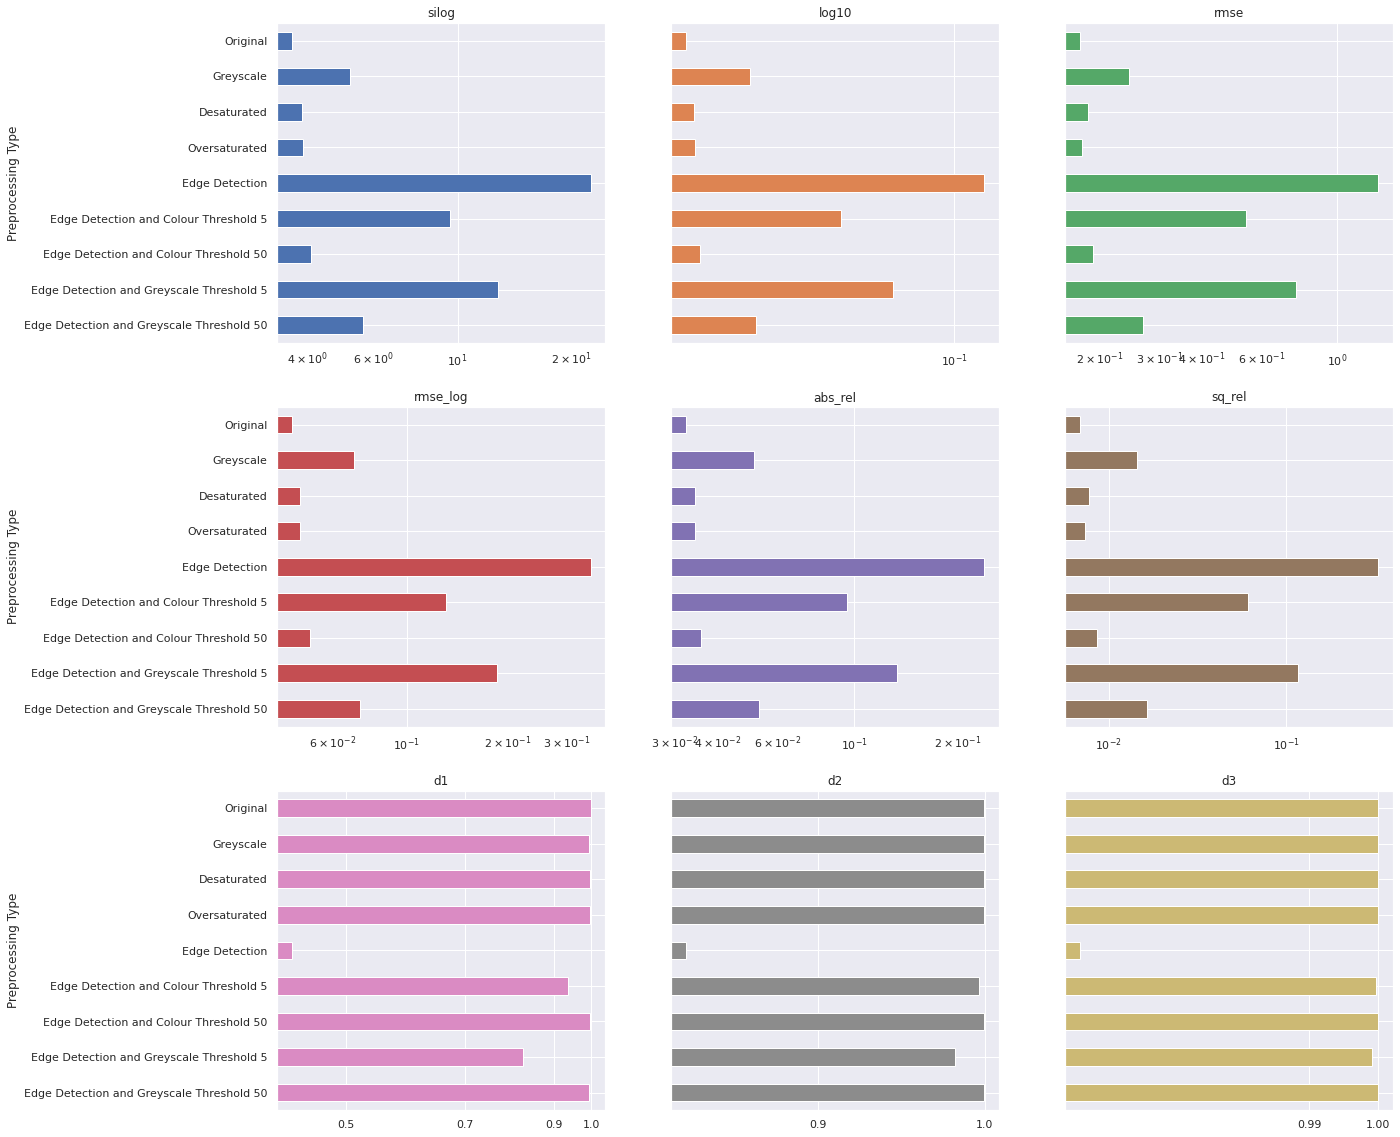

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=[20,20], sharey=True)

for axs in axes[:-1]:
  for ax in axs:
    ax.set_xscale("log")

for ax in axes[2][:2]:
  ax.set_xscale("log")
  ax.get_xaxis().set_major_formatter(ScalarFormatter())
  ax.get_xaxis().set_minor_formatter(NullFormatter())
  ax.set_xticks([0.5, 0.7, 0.9, 1])

ax = axes[2][2]
ax.set_xscale("log")
ax.get_xaxis().set_major_formatter(ScalarFormatter())
ax.get_xaxis().set_minor_formatter(NullFormatter())
ax.set_xticks([0.9, 0.95, 0.99, 1])


p = df_new[df_new["Dataset"] == "nyu"].reset_index(drop=True).drop(['Dataset', 'Drive', 'Unnamed: 0'], axis=1).groupby('Preprocessing Type').median().sort_values(by='Sorted', ascending=False).drop('Sorted', axis=1).plot.barh(subplots=True, ax=axes, legend=None)
plt.show()

In [ ]:
os.chdir('../../../Code')

In [ ]:
from PIL import Image
import os
import glob

os.chdir('../Image/kitti')
for frame_folder in os.listdir('.'):
  os.chdir(frame_folder)
  print(f'working on {frame_folder}')
  images = glob.glob("*.png")
  if not images:
    os.chdir('..')
    continue
  images.sort(key=os.path.getmtime)
  images = images[:500]
  frames = [Image.open(image) for image in images]
  frame_one = frames[0]
  frame_one.save(f"00_animation.gif", format="GIF", append_images=frames,
              save_all=True, duration=100, loop=0)
  os.chdir('..')
os.chdir('../../Code')

working on Desat
working on Edge
working on EdgeCol5
working on EdgeCol50
working on EdgeGrey5
working on EdgeGrey50
working on Grey
working on GT
working on Original
working on Sat


In [ ]:
from PIL import Image
import os
import glob
import re

os.chdir('../Image/nyu')
for frame_folder in os.listdir('.'):
  os.chdir(frame_folder)
  print(f'working on {frame_folder}')
  images = glob.glob("*.png")
  if not images:
    os.chdir('..')
    continue
  images.sort(key=lambda name: (re.findall("(.*)_[0-9]*\.png", name)[0], int(re.findall("([0-9]*)\.png", name)[0])))
  images = images[:500]
  frames = [Image.open(image) for image in images]
  frame_one = frames[0]
  frame_one.save(f"00_animation.gif", format="GIF", append_images=frames,
              save_all=True, duration=100, loop=0)
  os.chdir('..')
os.chdir('../../Code')

working on Desat
working on Edge
working on EdgeCol5
working on EdgeCol50
working on EdgeGrey5
working on EdgeGrey50
working on Grey
working on GT
working on Original
working on Sat


In [ ]:
from visualiser import *
from image_preprocessing import *
from PIL import Image
from GLPN import GLPN

model = GLPN(False)

image = Image.open("../Images/GLPN/0/original_sample.png")
prediction_sat = model.predict_cpu(desaturated(image, 2))
inferno(prediction_sat, "Sat_depth.png")

prediction_gdege_grey_5 = model.predict_cpu(edge_col(image, 5))
inferno(prediction_gdege_grey_5, "EdgeCol5_depth.png")

prediction_gdege_grey_50 = model.predict_cpu(edge_col(image, 50))
inferno(prediction_gdege_grey_50, "EdgeCol50_depth.png")

GLPN: Initialising...
GLPN: Saved Model not Found...
GLPN: Model calculated ...
